<a href="https://colab.research.google.com/github/Rivenception/CSC521_Algorithms/blob/main/Research_Project/FF_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# data source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Building the Feed-Forward Neural Network Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import Adam

all_pollution_data = pd.read_csv("/content/drive/My Drive/FFNN_Taiwain_2009_2011.csv")

#show the first 5 rows of DataFrame
all_pollution_data.head()

# PM2.5 column only
X = all_pollution_data.drop(['PM2.5'],axis=1).values
Y = all_pollution_data[['PM2.5']].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

def create_model(learning_rate, dropout_rate):
  model = Sequential()
  model.add(Input(shape=(11,)))  # Define input shape here
  #Creating a Hidden layer with 100 neurons, 11 inputs, and applying the sigmoid activation function
  model.add(Dense(100, activation='sigmoid'))
  #Dropping out a percentage of the inputs randomly during each training epoch to prevent overfitting
  model.add(Dropout(dropout_rate))
  model.add(Dense(50, activation='sigmoid'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(25, activation='sigmoid'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='linear'))
  adam = Adam(learning_rate=learning_rate)
  model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
  return model

dropout_rate = 0.1

epochs = 50
learn_rate = 0.001
model = create_model(learn_rate, dropout_rate)

model_history = model.fit(X_train, Y_train, batch_size= 1, epochs=epochs, validation_split=0.2, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy with Mean Absolute Error:', score[1])

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 361.0386 - mae: 15.2992 - val_loss: 222.8567 - val_mae: 11.1645
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 208.4632 - mae: 10.5658 - val_loss: 154.7220 - val_mae: 9.0268
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 156.3744 - mae: 8.9047 - val_loss: 131.9132 - val_mae: 8.4204
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 132.7592 - mae: 8.7638 - val_loss: 126.9690 - val_mae: 8.3349
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 132.9401 - mae: 8.2865 - val_loss: 79.8831 - val_mae: 5.8211
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 90.1562 - mae: 6.2782 - val_loss: 62.9582 - val_mae: 5.1755
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 63.1541 - mae: 5.0183 - val_loss: 53.6132 - val_mae: 4.9904
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 73.3020 - mae: 5.8063 - val_loss: 45.4799 - val_mae: 4.5666
Epoch 9/50
700/700 ━━━━━━━━━

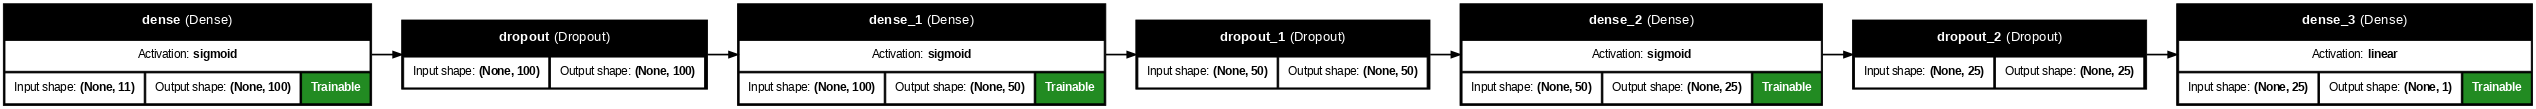

In [7]:
#Visually mapping the data shape and training actions of the Neural Network
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, \
           show_layer_activations=True, show_trainable=True, dpi=60, rankdir='LR')

Text(0.5, 0, 'Epoch')

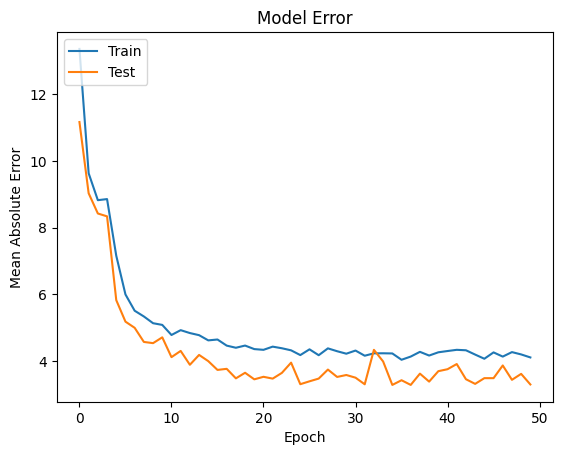

In [8]:
#Plot the model in a graph
import matplotlib.pyplot as plt

plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Model Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')

In [9]:
#Running a Prediction
X_new = ([[12.67, 0.31, 1.32, 8.38, 9.70, 33.69, 57.83, 57.45, 4.66, 272.78, 3.02]])
X_new = np.array(X_new)

prediction = model.predict(X_new)
print("The Expected Prediction Value: 30.13")
print("The PM 2.5 would be:",prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
The Expected Prediction Value: 30.13
The PM 2.5 would be: [[26.594858]]
